In [1]:
# tutorial is based on https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

import pandas as pd

data_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
col_names = ["variance", "skewness", "curtosis", "entropy", "class"]

bankdata = pd.read_csv(data_link, names=col_names, sep=",", header=None)
bankdata.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [2]:
bankdata['class'].unique()

array([0, 1])

In [3]:
bankdata['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [4]:
bankdata['class'].value_counts(normalize=True)

class
0    0.555394
1    0.444606
Name: proportion, dtype: float64

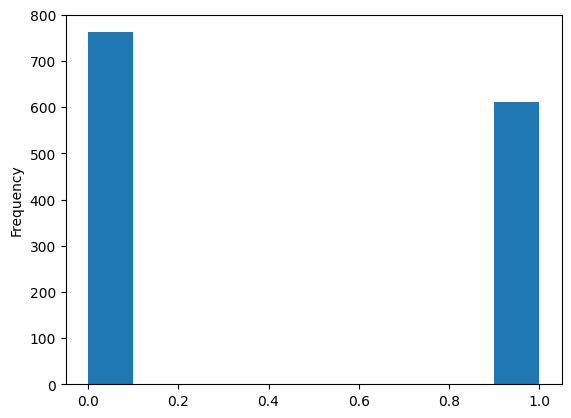

In [5]:
bankdata['class'].plot.hist();

In [6]:
bankdata.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [7]:
# predictors vs class
y = bankdata['class']
X = bankdata.drop('class', axis=1) # axis=1 means dropping from the column axis

In [8]:
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [9]:
xtrain_samples = X_train.shape[0]
xtest_samples = X_test.shape[0]

print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')

There are 1097 samples for training and 275 samples for testing.


In [10]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',verbose=1,gamma=0.25) # auto means, gamma = 1/nfeatures

In [11]:
svc.fit(X_train, y_train)

[LibSVM]*
optimization finished, #iter = 818
obj = -40.031063, rho = -0.142910
nSV = 240, nBSV = 4
Total nSV = 240


SVC(gamma=0.25, verbose=1)

In [12]:
y_pred = svc.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



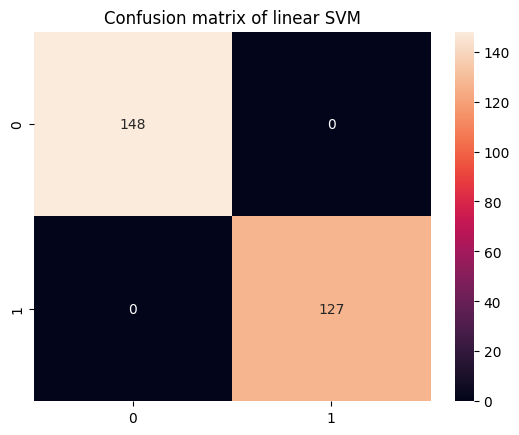

In [13]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       483

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



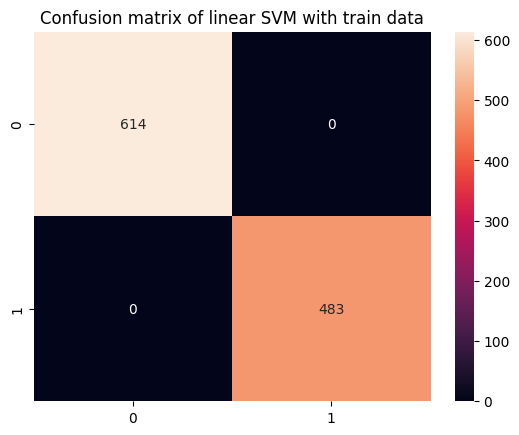

In [14]:
y_pred_train = svc.predict(X_train)

cm_train = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d').set_title('Confusion matrix of linear SVM with train data')

print(classification_report(y_train,y_pred_train))

In [15]:
svc.get_params()
print(svc.n_support_)

[134 106]


In [16]:
# get the actual output of SVM
decision_function = svc.decision_function(X_test)

In [17]:
print(decision_function)

[-1.16474372 -1.00000398 -0.94043839 -1.07545647 -1.03390499 -1.01259242
 -0.95736237 -1.15249297 -1.19046994 -1.0186568   1.11282272  1.0380247
 -1.12159639  1.1299     -0.97473187  1.15106865  1.21369472  1.21523898
  0.88847043  0.88071385 -1.07065518 -1.0857772   0.95055697 -0.92999779
  1.02718156 -1.12357577 -0.99126499  1.21779562 -1.02092671 -1.01891744
  1.04921744 -1.11228635 -1.1895925   1.0494126   0.98873831 -1.08717908
  1.05788104  1.33047532  1.06637648 -1.05785204 -1.08475962  1.0559138
  1.10796377 -1.05861549  1.2383272   1.13076298  1.22509633 -1.21691614
 -0.99777796  1.15625312 -1.11270092 -1.10916838 -1.05235753 -1.16640881
 -1.019097    1.06480427 -1.10058128 -1.15233282 -1.12422244 -1.0500774
  1.27932728 -1.05075036  1.06483006 -0.9302068  -1.06956037 -1.14429608
 -1.072282   -1.0695606  -1.07923077  1.03259278  0.9355135  -1.05306496
  1.0457667  -1.10485725  0.89727827 -1.00005656 -1.04863542  1.04650965
  0.99161238  1.00138028  0.99891669 -0.66752403  1.05

In [19]:
import numpy as np
print("svc.gamma: ", svc.gamma)
print("svc.degree: ", svc.degree)

sv=open("../data-kernel-model-rbf/support_vectors_rbf.txt","w")
dual_coeff=open("../data-kernel-model-rbf/dual_coeff_rbf.txt","w")
intercept=open("../data-kernel-model-rbf/intercept_rbf.txt","w")
xtestSample="../data-kernel-model-rbf/xtest_rbf.txt"
ytestSample="../data-kernel-model-rbf/ytest_rbf.txt"
ytestClassificationScore="../data-kernel-model-rbf/yclassificationscore.txt"

np.savetxt(sv,svc.support_vectors_)
    
np.savetxt(dual_coeff,svc.dual_coef_,delimiter=' ')
np.savetxt(intercept,svc.intercept_,delimiter=' ')

with open(xtestSample, "w") as f1:
    for item in X_test.head(1).iloc[0].values:
        f1.write(str(item) + " ")
        
np.savetxt(ytestSample,y_test.head(1), delimiter=' ')
with open(ytestClassificationScore, "w") as f2:
    f2.write(str(decision_function[0]))
    
sv.close()
dual_coeff.close()
intercept.close()
f1.close()
f2.close()

svc.gamma:  0.25
svc.degree:  3
